In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
pip install notebook --upgrade

Requirement already up-to-date: notebook in e:\pytohn\lib\site-packages (6.1.4)
Note: you may need to restart the kernel to use updated packages.


In [15]:
data=pd.read_csv('F:\CLV - Govindaraj V.csv')

In [16]:
data

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163
...,...,...
298,241,123
299,264,132
300,193,141
301,131,115


In [17]:
data.describe()

,INCOME,SPEND
count,303.000000,303.000000
mean,245.273927,149.646865
std,48.499412,22.905161
min,126.000000,71.000000
25%,211.000000,133.500000
50%,240.000000,153.000000
75%,274.000000,166.000000
max,417.000000,202.000000


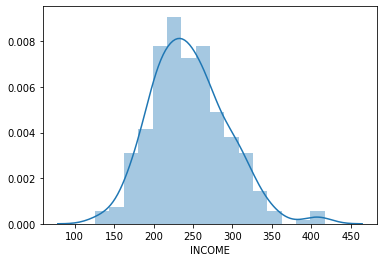

In [18]:
sns.distplot(data['INCOME'])

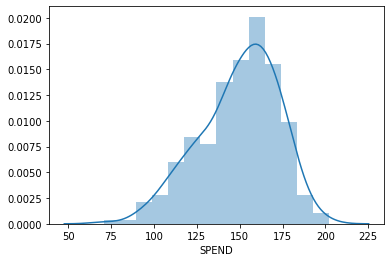

In [19]:
sns.distplot(data['SPEND'])

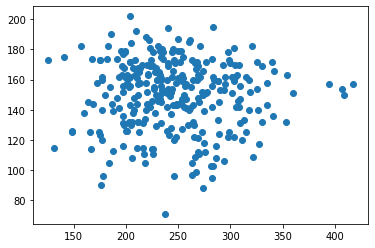

In [20]:
plt.scatter(data["INCOME"],data["SPEND"])

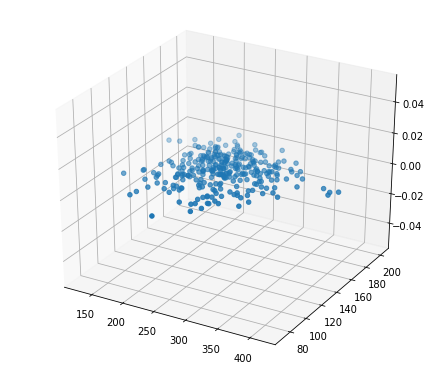

In [21]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(6,5))
ax=Axes3D(fig)
ax.scatter(data['INCOME'],data['SPEND'])

In [38]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2)
km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [39]:
label=km.labels_

In [40]:
from sklearn.metrics import silhouette_score
print('Silhouette Score\n')
print(silhouette_score(data,label))

Silhouette Score

0.44006694211403197


In [41]:
label

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,

Text(0, 0.5, 'Sum of squared error')

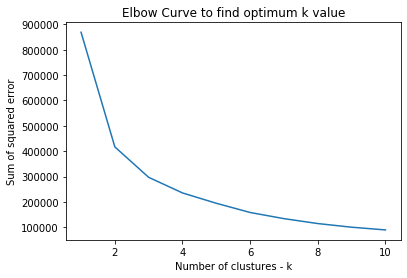

In [42]:
from sklearn.cluster import KMeans
sse=[]
for k in range(1,11):
    km=KMeans(n_clusters=k)
    km.fit(data)
    sse.append(km.inertia_)
plt.plot(range(1,11),sse)
plt.title('Elbow Curve to find optimum k value')
plt.xlabel('Number of clustures - k')
plt.ylabel('Sum of squared error')

In [43]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2)
km.fit(data)
label=km.labels_
from sklearn.metrics import silhouette_score
print('Silhouette Score\n')
print(silhouette_score(data,label))

Silhouette Score

0.44006694211403197


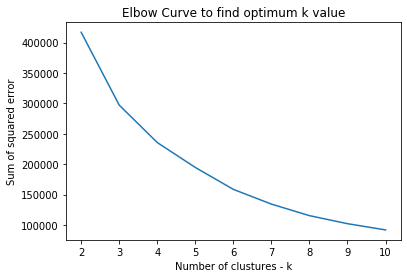

In [46]:
from sklearn.cluster import KMeans
sse=[]
for k in range(2,11):
    km=KMeans(n_clusters=k)
    km.fit(data)
    sse.append(km.inertia_)
    label=km.labels_
    
plt.plot(range(2,11),sse)
plt.title('Elbow Curve to find optimum k value')
plt.xlabel('Number of clustures - k')
plt.ylabel('Sum of squared error')
plt.show()
    

In [48]:
for k in range(2,11):
    kmeans=KMeans(n_clusters=k).fit(data)
    label=kmeans.labels_
    silhouette_coef=silhouette_score(data,label,metric='euclidean')
    print('for n_clusters={},The silhouette score is{}'.format(k,silhouette_coef))

for n_clusters=2,The silhouette score is<function silhouette_score at 0x000001D756817DC8>
for n_clusters=3,The silhouette score is<function silhouette_score at 0x000001D756817DC8>
for n_clusters=4,The silhouette score is<function silhouette_score at 0x000001D756817DC8>
for n_clusters=5,The silhouette score is<function silhouette_score at 0x000001D756817DC8>
for n_clusters=6,The silhouette score is<function silhouette_score at 0x000001D756817DC8>
for n_clusters=7,The silhouette score is<function silhouette_score at 0x000001D756817DC8>
for n_clusters=8,The silhouette score is<function silhouette_score at 0x000001D756817DC8>
for n_clusters=9,The silhouette score is<function silhouette_score at 0x000001D756817DC8>
for n_clusters=10,The silhouette score is<function silhouette_score at 0x000001D756817DC8>
